In [27]:
#importing necessary modules and functions
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import featuretools as ft

In [28]:
wine=pd.read_csv("C:/Users/Venu  Gopal/Desktop/Knight ML Assignment/Knight ML Assignment/Data/train.csv")
test_df=pd.read_csv("C:/Users/Venu  Gopal/Desktop/Knight ML Assignment/Knight ML Assignment/Data/test.csv")

In [29]:
wine.shape,test_df.shape

((82657, 12), (20665, 11))

In [30]:
wine.head(3)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo


In [31]:
wine['review_title'].loc[0]

'Andrew Peace 2007 Peace Family Vineyard Chardonnay (South Eastern Australia)'

- Review title actually has the variety name, so extracting it will be of great significance
- User_name,Country,points,price,region_1,province,winery might be more important

In [32]:
wine=wine[['country','price','points','region_1','variety','user_name','province','winery']]
test_df=test_df[['country','price','points','region_1','user_name','province','winery']]

In [33]:
wine=wine.dropna()
test_df=test_df.dropna()

In [34]:
wine['review']=pd.cut(wine['points'],3,labels=['good','vgood','vvgood'])
test_df['review']=pd.cut(test_df['points'],3,labels=['good','vgood','vvgood'])

In [35]:

label_encoder = LabelEncoder()
for i in ['country','price','points','region_1','review','user_name','province','winery']:
    print(i, end=" ")
    wine[str(i)+'enc']=label_encoder.fit_transform(wine[i])
    test_df[str(i)+'enc']=label_encoder.fit_transform(test_df[i])
wine['varietyenc']=label_encoder.fit_transform(wine['variety'])

country price points region_1 review user_name province winery 

In [36]:
wine.drop(['country','price','points','region_1','user_name','province','winery','variety','review'],axis=1,inplace=True)
test_df.drop(['country','price','points','region_1','user_name','province','winery','review'],axis=1,inplace=True)

In [37]:
wine.corr()

,countryenc,priceenc,pointsenc,region_1enc,reviewenc,user_nameenc,provinceenc,wineryenc,varietyenc
countryenc,1.000000,0.035838,0.141455,0.202341,0.116462,-0.142025,0.047083,0.112952,0.176954
priceenc,0.035838,1.000000,0.530426,-0.011550,0.435332,-0.011313,-0.053277,0.000140,-0.112976
pointsenc,0.141455,0.530426,1.000000,0.015038,0.814046,-0.128513,-0.035245,0.005707,-0.028336
region_1enc,0.202341,-0.011550,0.015038,1.000000,0.004610,0.138007,0.066798,0.073579,0.081985
reviewenc,0.116462,0.435332,0.814046,0.004610,1.000000,-0.116368,-0.004390,0.006078,-0.022847
user_nameenc,-0.142025,-0.011313,-0.128513,0.138007,-0.116368,1.000000,-0.067254,-0.067578,-0.169343
provinceenc,0.047083,-0.053277,-0.035245,0.066798,-0.004390,-0.067254,1.000000,0.040238,0.164386
wineryenc,0.112952,0.000140,0.005707,0.073579,0.006078,-0.067578,0.040238,1.000000,0.084704
varietyenc,0.176954,-0.112976,-0.028336,0.081985,-0.022847,-0.169343,0.164386,0.084704,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2AF77D940>,
      dtype=object)

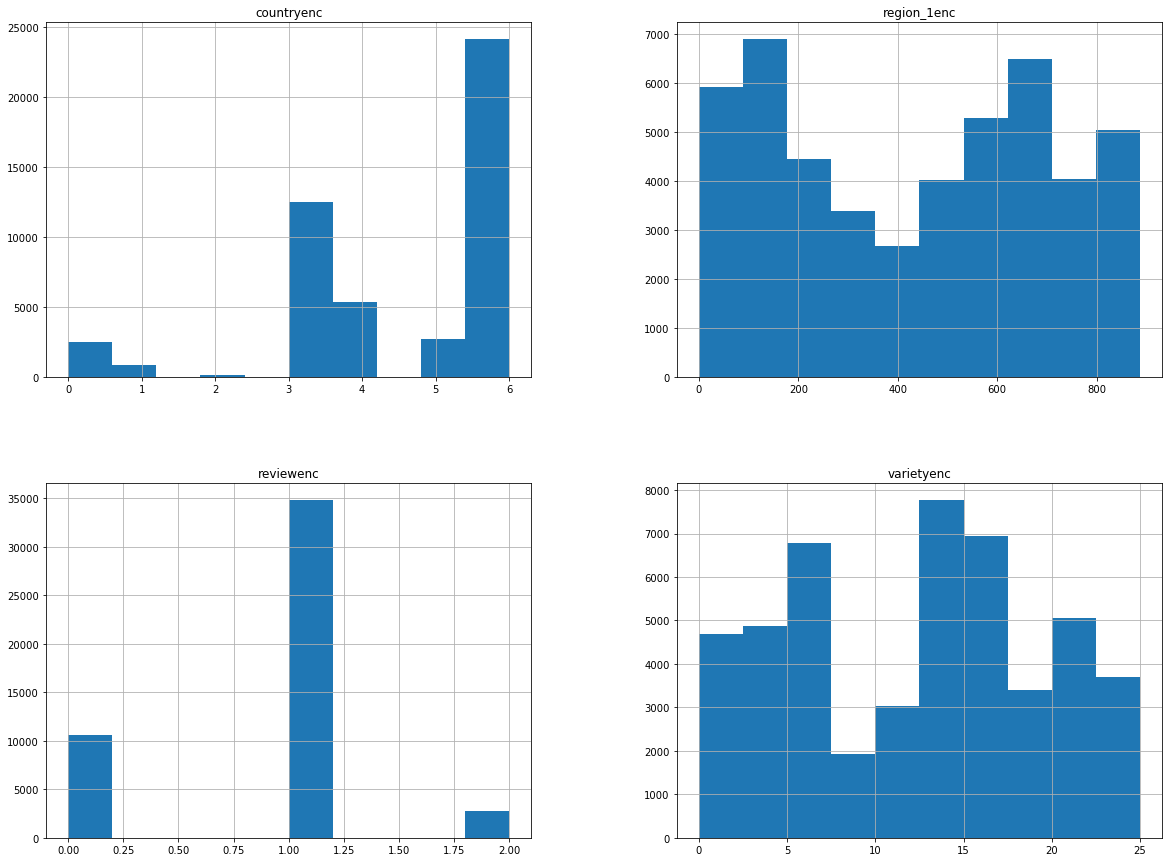

In [38]:

wine[['countryenc', 'reviewenc', 'region_1enc', 'varietyenc']].hist(figsize=(20,15))

### Splitting data 

In [43]:
X=wine.drop('varietyenc',axis=1)
Y=wine['varietyenc']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [44]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
y_pred=DTC.predict(X_test)

In [45]:
accuracy_score(Y_test, y_pred)

0.5874387305807095

### Implementing Random Forest 

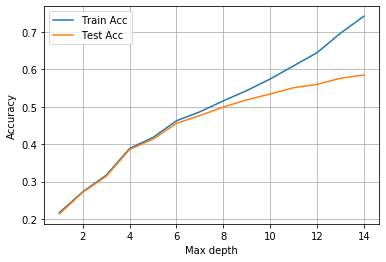

In [42]:


RFtest=pd.DataFrame()
for i in range(1, 15):
    RFC = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=0)
    RFC.fit(X_train, Y_train)
    y_train_pred=RFC.predict(X_train)
    y_test_pred=RFC.predict(X_test)
    RFtest.at[i, 'TrainAcc']=accuracy_score(Y_train, y_train_pred)
    RFtest.at[i, 'TestAcc']=accuracy_score(Y_test, y_test_pred)
plt.plot(RFtest.index, RFtest.TrainAcc, label='Train Acc')
plt.plot(RFtest.index, RFtest.TestAcc, label='Test Acc')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.grid()



- Choosing max_depth =15

In [46]:
RFC = RandomForestClassifier(max_depth=15, random_state=0)

RFC.fit(X_train, Y_train)
y_pred=RFC.predict(X_test)
accuracy_score(Y_test, y_pred)

0.5947495223062225

In [48]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       860
           1       0.91      0.56      0.70       128
           2       0.63      0.19      0.29       163
           3       0.43      0.52      0.47      1046
           4       0.75      0.94      0.83       211
           5       0.48      0.50      0.49      1430
           6       0.98      0.97      0.97       161
           7       0.41      0.27      0.33       142
           8       0.25      0.22      0.24         9
           9       0.51      0.72      0.60       464
          10       0.35      0.10      0.15       324
          11       0.98      0.97      0.98       363
          12       0.68      0.48      0.56       107
          13       0.45      0.38      0.41       240
          14       0.62      0.81      0.70      1697
          15       0.59      0.63      0.61      1161
          16       0.69      0.55      0.61       220
          17       0.42    

- Least Precision for a class is 0.25, max is 0.98

### Feature Extraction 

In [50]:
es=ft.EntitySet(id='Wine')

In [51]:
es.entity_from_dataframe(entity_id='data',dataframe=X,make_index=True,index='index')

Entityset: Wine
  Entities:
    data [Rows: 48147, Columns: 9]
  Relationships:
    No relationships

In [52]:
feature_matrix,feature_defs=ft.dfs(entityset=es,target_entity='data',max_depth=1,trans_primitives=['add_numeric','multiply_numeric'])

In [53]:
x_train,x_test,y_train,y_test=train_test_split(feature_matrix,Y,test_size=0.25,random_state=10)

In [54]:
RFC2=RandomForestClassifier(max_depth=15,random_state=10)

In [55]:
RFC2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [56]:
accuracy_score(y_train,RFC2.predict(x_train)),accuracy_score(y_test,RFC2.predict(x_test))

(0.787870396012185, 0.6086234111489573)

-There is an increment in accuracy to 60%

In [64]:
results=pd.DataFrame({'Decision_tree':accuracy_score(Y_test,DTC.predict(X_test)),
                      'RandomForest':accuracy_score(Y_test,y_pred=RFC.predict(X_test)),
                     'After_feautue_extraction':accuracy_score(y_test,RFC2.predict(x_test))},index=[0])
results

,Decision_tree,RandomForest,After_feautue_extraction
0,0.587439,0.59475,0.608623


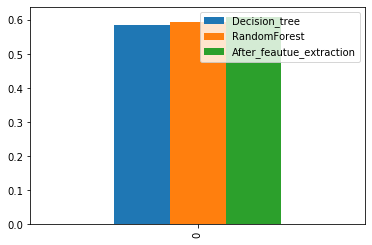

In [65]:
results.plot(kind="bar")

In [66]:
Y_SOl=RFC2.predict(x_test)

In [68]:
Y_SOl=label_encoder.inverse_transform(Y_SOl)
Y_SOl

array(['Syrah', 'Red Blend', 'Red Blend', ..., 'Nebbiolo', 'Pinot Noir',
       'Sangiovese'], dtype=object)